In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [30]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./u.user', sep='|', names=u_cols, encoding='latin-1')
# users = users.set_index('user_id')
# users.head()

# u.itm 파일을 DataFrame으로 읽기
i_cols = ['movie_id', 'title', 'release date', 'video release date', 'IMDB URL', 
    'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
    'Romance', 'Sci-fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('./u.item', sep='|', names=i_cols, encoding='latin-1')
# movies = movies.set_index('movie_id')
# movies.head()

# u.data
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('./u.data', sep='\t', names=r_cols, encoding='latin-1')
# ratings = ratings.set_index('user_id')
# ratings.head()

# remove timestamp
ratings = ratings.drop('timestamp', axis=1)
# ratings.head()

# remove all except movie id and title
movies = movies[['movie_id', 'title']]
# movies.head()

In [31]:
X = ratings.copy() # deep copy
y = ratings['user_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [32]:
def RMSE(y_true, y_pred): # root mean square error
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

def score(model):
    id_pairs = zip(X_test['user_id'], X_test['movie_id'])
    y_pred = np.array([model(user, movie) for (user, movie) in id_pairs])
    y_true = np.array(X_test['rating'])
    return RMSE(y_true, y_pred)

rating_matrix = X_train.pivot(index='user_id', columns='movie_id', values='rating')
print(rating_matrix)

movie_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                               ...   
1          NaN   3.0   4.0   3.0   3.0   5.0   NaN   NaN   NaN   3.0  ...   
2          4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5          4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
939        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0   NaN  ...   
940        NaN   NaN   NaN   2.0   NaN   NaN   4.0   5.0   NaN   NaN  ...   
941        5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
942        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
943        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

In [33]:
# user의 id를 말한다
rating_matrix.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

<AxesSubplot: xlabel='movie_id', ylabel='user_id'>

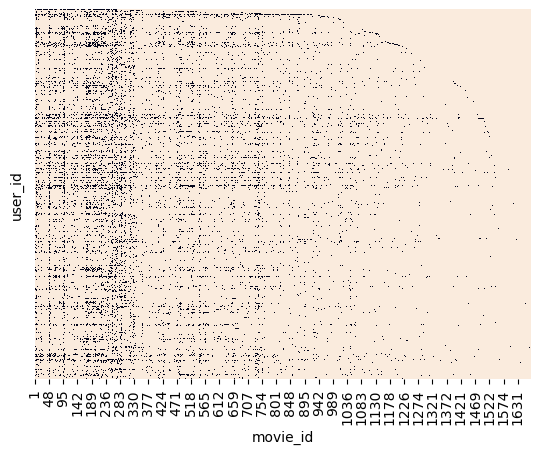

In [34]:
sns.heatmap(rating_matrix.isnull(), yticklabels=False, cbar=False)

In [35]:
# train set의 모든 가능한 사용자 pair의 cosine similarities를 계산
matrix_dummy = rating_matrix.copy().fillna(0)

In [36]:
matrix_dummy.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1668,1669,1671,1672,1673,1674,1678,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,3.0,4.0,3.0,3.0,5.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: xlabel='movie_id', ylabel='user_id'>

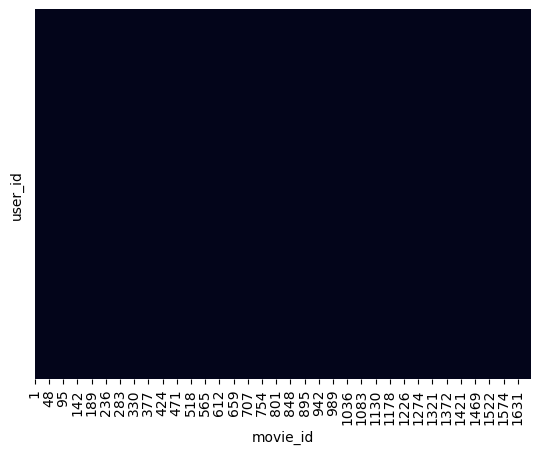

In [37]:
sns.heatmap(matrix_dummy.isnull(), yticklabels=False, cbar=False)

In [38]:
user_similarity = cosine_similarity(matrix_dummy, matrix_dummy)

In [20]:
user_similarity[0]

array([1.        , 0.08942574, 0.04468103, 0.0371232 , 0.25500677,
       0.31708966, 0.31989468, 0.24562541, 0.08230458, 0.2854301 ,
       0.23715112, 0.28517844, 0.32900794, 0.28556999, 0.13257422,
       0.28115383, 0.11587822, 0.31867088, 0.11614471, 0.21140169,
       0.18942019, 0.3505704 , 0.30413245, 0.20495361, 0.27092286,
       0.16206448, 0.07201954, 0.21690535, 0.10527304, 0.16924799,
       0.11591228, 0.13530511, 0.03151214, 0.03646765, 0.02385733,
       0.        , 0.23018709, 0.20669262, 0.02987854, 0.06180479,
       0.29916503, 0.28555597, 0.33490323, 0.38373365, 0.15741121,
       0.06639051, 0.02363366, 0.13119893, 0.22714231, 0.07644041,
       0.15100494, 0.12788586, 0.17305298, 0.15714009, 0.172456  ,
       0.34846416, 0.199756  , 0.31301296, 0.39773502, 0.30710914,
       0.00285672, 0.3043795 , 0.14935923, 0.36340825, 0.20444701,
       0.16313382, 0.13228578, 0.15222852, 0.24211532, 0.30590904,
       0.16293735, 0.36535159, 0.24485438, 0.08578727, 0.11234

In [21]:
# user가 movie에 대한 선호도를 나타낸다
# 사람은 943명이고 영호는 1600개이다
# 한사람의 전체 영화에 대한 선호도는 1600개이며, 이에 대한 코사인 유사도는 943 * 943개이다

len(user_similarity[0])

943

In [39]:
user_similarity = pd.DataFrame(user_similarity, index=rating_matrix.index, columns=rating_matrix.index)

In [40]:
user_similarity.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.132492,0.044379,0.011903,0.283018,0.327089,0.316042,0.255527,0.026454,0.304425,...,0.313869,0.092433,0.196545,0.128247,0.126477,0.066290,0.229069,0.080403,0.103864,0.300428
2,0.132492,1.000000,0.050417,0.081481,0.060709,0.182481,0.062589,0.035746,0.078231,0.137509,...,0.136285,0.288251,0.286690,0.371607,0.237991,0.179124,0.138360,0.135097,0.112923,0.120631
3,0.044379,0.050417,1.000000,0.301350,0.027520,0.080473,0.056720,0.031630,0.084125,0.047789,...,0.042662,0.058322,0.181236,0.074822,0.111907,0.035662,0.119559,0.130451,0.113545,0.035648
4,0.011903,0.081481,0.301350,1.000000,0.013009,0.051408,0.071043,0.064379,0.063124,0.055659,...,0.039837,0.000000,0.099988,0.131001,0.068430,0.041626,0.177509,0.124581,0.119279,0.053498
5,0.283018,0.060709,0.027520,0.013009,1.000000,0.208744,0.260880,0.172487,0.013878,0.144498,...,0.257280,0.073586,0.068258,0.092164,0.084010,0.061011,0.211087,0.130863,0.110077,0.228701


In [43]:
# 주어진 영화의 (movie_id) 가중평균 rating을 계산하는 함수, 
# 가중치는 주어진 사용자와 다른 사용자 간의 유사도(user_similarity)
def CF_simple(user_id, movie_id):
    if movie_id in rating_matrix:
        sim_scores = user_similarity[user_id].copy()
        movie_ratings = rating_matrix[movie_id].copy()
        none_rating_idx = movie_ratings[movie_ratings.isnull()].index
        movie_ratings = movie_ratings.dropna()
        sim_scores = sim_scores.drop(none_rating_idx)
        mean_rating = np.dot(sim_scores, movie_ratings) / sim_scores.sum()
    else:
        mean_rating = 3.0
    return mean_rating

In [44]:
# 정확도 계산
score(CF_simple)

1.020035577990438